In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 1500x1200 with 0 Axes>

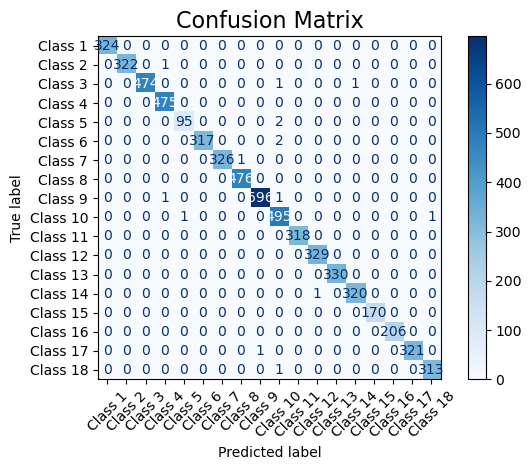

In [6]:
# 文件路径
file_path = 'E:\\0_STUDY!\\8_JupyterNoteBook\\0_ForJupyter\\MoShiShiBie\\DATA_final\\results_onTrain.txt'

# 加载并处理数据
data = np.loadtxt(file_path, dtype=str)
pred_labels = data[1:, 0].astype(int)  # 假设第一列是预测标签
true_labels = data[1:, 1].astype(int)  # 假设第二列是真实标签

# 获取所有实际出现过的类别
all_labels = np.unique(np.concatenate([true_labels, pred_labels]))
class_names = [f'Class {i}' for i in all_labels]

# 计算混淆矩阵，指定labels参数保证类别顺序一致
cm = confusion_matrix(true_labels, pred_labels, labels=all_labels)

# 定义类别标签（与实际类别数量一致）
class_names = [f'Class {i+1}' for i in all_labels]

# 绘制混淆矩阵
plt.figure(figsize=(15, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation=45)

# 调整图表显示
plt.title('Confusion Matrix', fontsize=16)
plt.tight_layout()

# 显示图表
plt.show()


# 可选：保存图表
# plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')

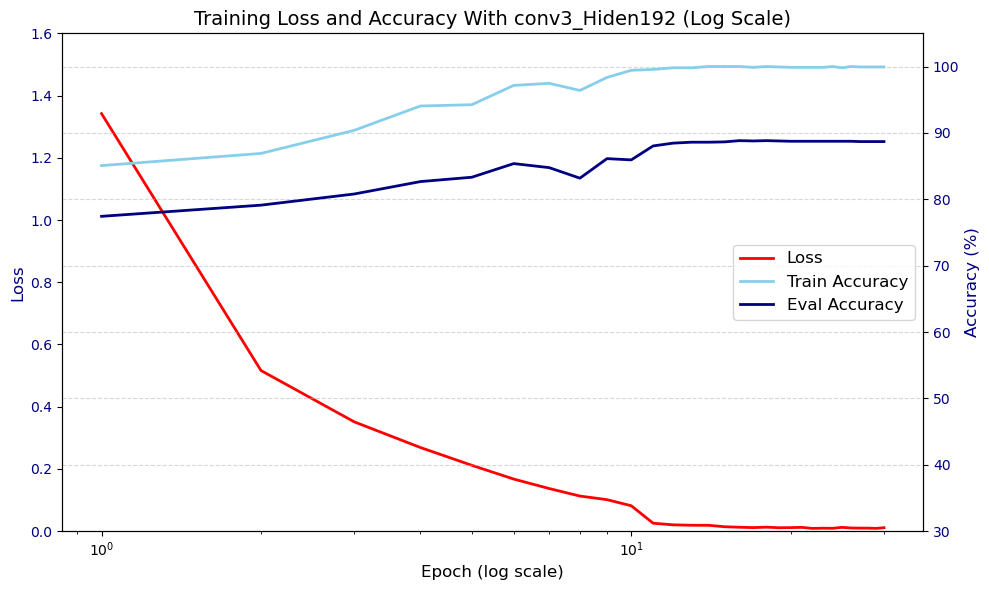

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 读取三个文件的数据

data = np.loadtxt('E:/0_STUDY!/8_JupyterNoteBook/0_ForJupyter/MoShiShiBie/DATA_final/conv3_hid192_process.txt')
x = range(1, len(data) + 1)
loss1 = data[:, 0]
ac_rate_train = data[:, 1]
ac_rate_eva = data[:, 2]

fig, ax1 = plt.subplots(figsize=(10, 6))

# 左侧y轴：loss
ax1.plot(x, loss1, color='r', linewidth=2, label='Loss')
ax1.set_xlabel('Epoch (log scale)', fontsize=12)
ax1.set_ylabel('Loss', color='navy', fontsize=12)
ax1.set_xscale('log')
ax1.tick_params(axis='y', labelcolor='navy')

# 右侧y轴：ac_rate
ax2 = ax1.twinx()
ax2.plot(x, ac_rate_train, color='skyblue', linewidth=2, label='Train Accuracy')
ax2.plot(x, ac_rate_eva, color='navy', linewidth=2, label='Eval Accuracy')
ax2.set_ylabel('Accuracy (%)', color='navy', fontsize=12)
ax2.tick_params(axis='y', labelcolor='navy')

# 图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, fontsize=12, loc='center right')

plt.title('Training Loss and Accuracy With conv3_Hiden192 (Log Scale)', fontsize=14)
ax1.grid(True, which="both", ls="--", alpha=0.5)
ax1.set_ylim(0, 1.6)
ax2.set_ylim(30, 105)
plt.tight_layout()
plt.savefig('E:/0_STUDY!/8_JupyterNoteBook/0_ForJupyter/MoShiShiBie/RESULT_final/loss_accuracy_conv3_hid192.png', dpi=300, bbox_inches='tight')
plt.show()